In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file("C:/Users/Tiffa/Documents/DA12/projects/geospatial-python-da12-Ranae0213/data/zipcodes.geojson")



In [3]:
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [4]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

<Axes: >

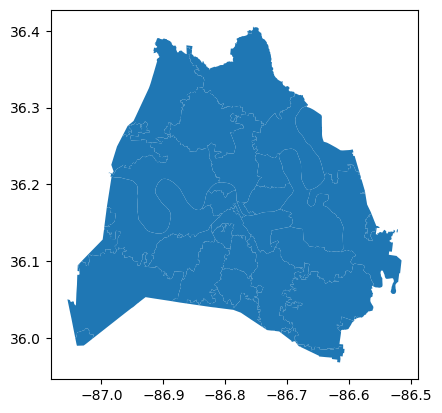

In [5]:
zipcodes.plot()

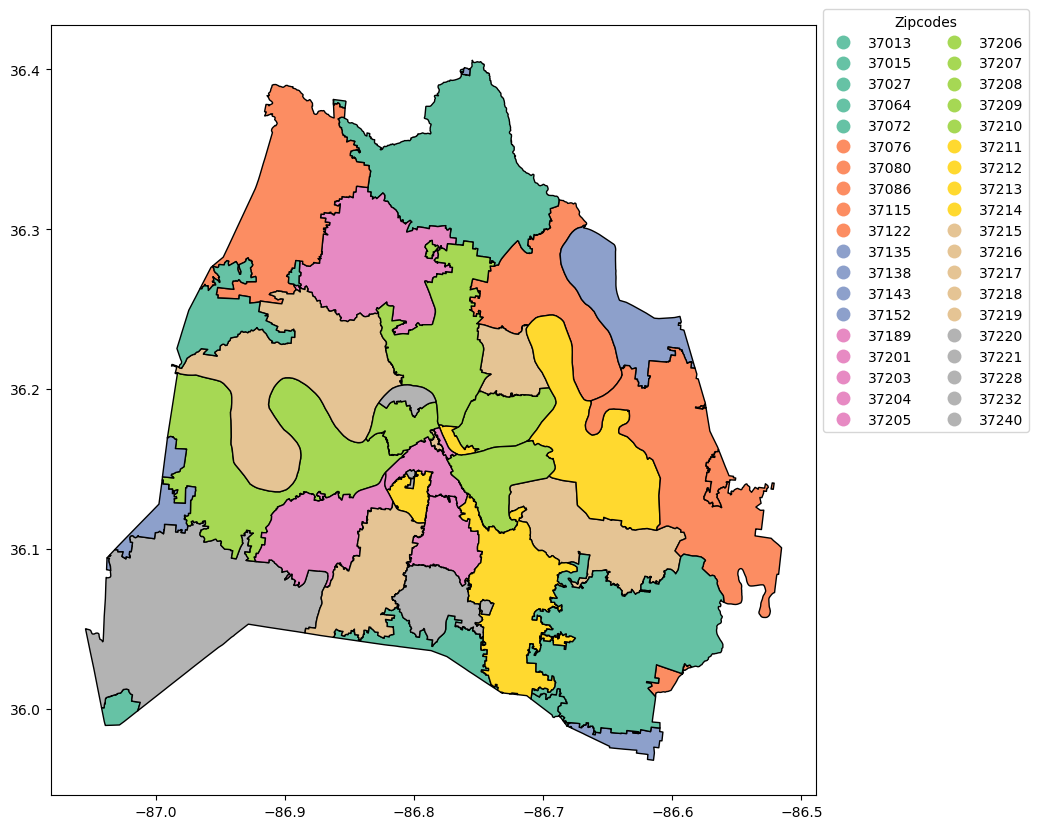

In [6]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [7]:
Building_Permits = gpd.read_file("C:/Users/Tiffa/Documents/DA12/projects/geospatial-python-da12-Ranae0213/data/Building_Permit.geojson")

In [8]:
print(Building_Permits.shape)
Building_Permits.head(3)

(6046, 22)


,Permit__,Permit_Type_Description,Permit_Subtype_Description,Parcel,Date_Entered,Date_Issued,Const_Cost,Address,City,State,...,Per_Ty,Per_SubTy,IVR_Trk_,Purpose,Council_Dist,Lon,Lat,ObjectId,ZIP,geometry
0,2023023374,Building Residential - Addition,Single Family Residence,10412024600,"Tue, 11 Apr 2023 05:00:00 GMT",None,0,1916 18TH AVE S,NASHVILLE,TN,...,CARA,CAA01R301,4302991,Addition and outbuilding construction must ...,18,-86.796767,36.134014,1,37212,POINT (-86.79677 36.13401)
1,D2020047607,Building Use & Occupancy,"Accessory Structure, Pools - Residential",11704002200,"Tue, 24 Oct 2023 05:00:00 GMT",None,100000,2509 BELMONT BLVD,NASHVILLE,TN,...,CAUO,CAA14U017,3856896,Proposed 13' x 32' Swimming Pool in rear yard.,18,-86.794539,36.125197,2,37212,POINT (-86.79454 36.12520)
2,D2020068970,Building Residential - Addition,Single Family Residence,06308004200,"Thu, 02 Feb 2023 06:00:00 GMT",None,105,4004 UNIVERSITY AVE,OLD HICKORY,TN,...,CARA,CAA01R301,3891358,"adding a 6' wide by 17.5' deep, single story a...",11,-86.633246,36.228955,3,37138,POINT (-86.63325 36.22896)


In [9]:
Building_Permits.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Permit__                    6046 non-null   object  
 1   Permit_Type_Description     6046 non-null   object  
 2   Permit_Subtype_Description  6046 non-null   object  
 3   Parcel                      6046 non-null   object  
 4   Date_Entered                6046 non-null   object  
 5   Date_Issued                 0 non-null      object  
 6   Const_Cost                  6046 non-null   int64   
 7   Address                     6046 non-null   object  
 8   City                        6046 non-null   object  
 9   State                       6046 non-null   object  
 10  Subdivision_Lot             6045 non-null   object  
 11  Contact                     6046 non-null   object  
 12  Per_Ty                      6046 non-null   object  
 13  Per_SubTy 

In [10]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [11]:
permit_type_mapping = {
    'Building Commercial - Addition':'CACA',
    'Building Blasting Permit' : 'CABL',
    'Building Commercial - Foundation':'CACF',
    'Building Commercial - Structural Frame': 'CACG',
    'Building Commercial - Shell': 'CACH',
    'Building Commercial - Fire Damage' : 'CACJ',
    'Building Commercial - Roofing / Siding' : 'CACK',
    'Building Commercial Rehab Storm Damage' : 'CACL',
    'Building Commercial - New' : 'CACN',
    'Building Demolition Permit' : 'CADM',
    'Building Commercial - Rehab' : 'CACR',
    'Building Commercial New Storm Damage': 'CACS',
    'Building Commercial - Tenant Finish Out' : 'CACT',
    'Building Commercial - Change Contractor' : 'CACP',
    'Building Demolition Storm Damage' : 'CADS',
    'Building Moving Permit' : 'CAMV',
    'Building Residential - Addition' : 'CARA',
    'Building Residential - Amend Permit' : 'CARE',
    'Building Residential - Foundation' : 'CARF',
    'Building Residential - Roofing / Siding' : 'CARK',
    'Building Residential Rehab Storm Damage' : 'CARL',
    'Building Residential - New': 'CARN',
    'Building Residential - Rehab' : 'CARR',
    'Building Residential New Storm Damage' : 'CARS',
    'Building Residential - Tenant Finish Out' : 'CART',
    'Building Residential - Change Contractor':'CARP',
    'Building Sign Permit' : 'CASN',
    'Building Tree Removal Permit' : 'CATR',
    'Building Use & Occupancy' : 'CAUO', 
    'Temporary Building Use & Occupancy' : 'CACU'
}

In [12]:
Building_Permits['Permit Type']=Building_Permits['Permit_Type_Description'].map(permit_type_mapping)

In [13]:
Building_Permits.head

<bound method NDFrame.head of          Permit__          Permit_Type_Description  \
0      2023023374  Building Residential - Addition   
1     D2020047607         Building Use & Occupancy   
2     D2020068970  Building Residential - Addition   
3     D2020080590       Building Residential - New   
4     D2021026275  Building Residential - Addition   
...           ...                              ...   
6041  T2024077229       Building Residential - New   
6042  T2024077700       Building Residential - New   
6043  T2024077721       Building Demolition Permit   
6044  T2024077763       Building Residential - New   
6045  T2024077731       Building Demolition Permit   

                    Permit_Subtype_Description          Parcel  \
0                      Single Family Residence     10412024600   
1     Accessory Structure, Pools - Residential     11704002200   
2                      Single Family Residence     06308004200   
3                      Single Family Residence  043060A01

In [14]:
permits_by_zip = gpd.sjoin(Building_Permits, zipcodes, predicate = 'within')

In [15]:
permits_by_zip.head()

,Permit__,Permit_Type_Description,Permit_Subtype_Description,Parcel,Date_Entered,Date_Issued,Const_Cost,Address,City,State,...,Council_Dist,Lon,Lat,ObjectId,ZIP,geometry,Permit Type,index_right,zip,po_name
0,2023023374,Building Residential - Addition,Single Family Residence,10412024600,"Tue, 11 Apr 2023 05:00:00 GMT",None,0,1916 18TH AVE S,NASHVILLE,TN,...,18,-86.796767,36.134014,1,37212,POINT (-86.79677 36.13401),CARA,9,37212,NASHVILLE
1,D2020047607,Building Use & Occupancy,"Accessory Structure, Pools - Residential",11704002200,"Tue, 24 Oct 2023 05:00:00 GMT",None,100000,2509 BELMONT BLVD,NASHVILLE,TN,...,18,-86.794539,36.125197,2,37212,POINT (-86.79454 36.12520),CAUO,9,37212,NASHVILLE
2,D2020068970,Building Residential - Addition,Single Family Residence,06308004200,"Thu, 02 Feb 2023 06:00:00 GMT",None,105,4004 UNIVERSITY AVE,OLD HICKORY,TN,...,11,-86.633246,36.228955,3,37138,POINT (-86.63325 36.22896),CARA,22,37138,OLD HICKORY
3,D2020080590,Building Residential - New,Single Family Residence,043060A01600CO,"Mon, 29 Nov 2021 06:00:00 GMT",None,439773,713 ELLIE DR,MADISON,TN,...,9,-86.700883,36.274176,4,37115,POINT (-86.70088 36.27418),CARN,0,37115,MADISON
4,D2021026275,Building Residential - Addition,Single Family Residence,16109004000,"Fri, 02 Aug 2024 05:00:00 GMT",None,318761,5500 THALMAN DR,BRENTWOOD,TN,...,26,-86.749685,36.045886,5,37027,POINT (-86.74968 36.04589),CARA,3,37027,BRENTWOOD


In [16]:
permits_by_zip['zip'].value_counts()

zip
37209    603
37206    489
37203    478
37207    431
37211    420
37218    355
37208    314
37013    295
37215    251
37115    230
37210    220
37216    218
37205    203
37076    202
37204    189
37221    176
37212    175
37214    148
37138    124
37217    115
37072     78
37201     71
37027     66
37220     51
37080     39
37219     26
37189     22
37228     13
37232      8
37135      7
37086      7
37143      6
37122      5
37213      5
37240      4
37015      2
Name: count, dtype: int64

In [17]:
permits_by_zip.columns

Index(['Permit__', 'Permit_Type_Description', 'Permit_Subtype_Description',
       'Parcel', 'Date_Entered', 'Date_Issued', 'Const_Cost', 'Address',
       'City', 'State', 'Subdivision_Lot', 'Contact', 'Per_Ty', 'Per_SubTy',
       'IVR_Trk_', 'Purpose', 'Council_Dist', 'Lon', 'Lat', 'ObjectId', 'ZIP',
       'geometry', 'Permit Type', 'index_right', 'zip', 'po_name'],
      dtype='object')

In [18]:
Building_Permits.columns

Index(['Permit__', 'Permit_Type_Description', 'Permit_Subtype_Description',
       'Parcel', 'Date_Entered', 'Date_Issued', 'Const_Cost', 'Address',
       'City', 'State', 'Subdivision_Lot', 'Contact', 'Per_Ty', 'Per_SubTy',
       'IVR_Trk_', 'Purpose', 'Council_Dist', 'Lon', 'Lat', 'ObjectId', 'ZIP',
       'geometry', 'Permit Type'],
      dtype='object')

<Axes: >

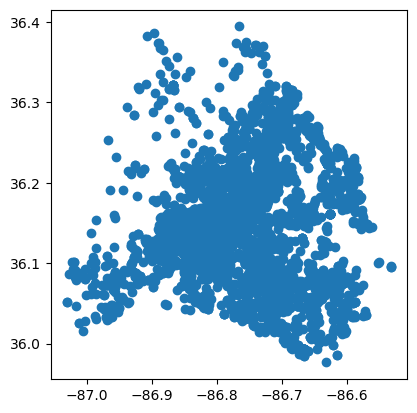

In [19]:
permits_by_zip.plot()

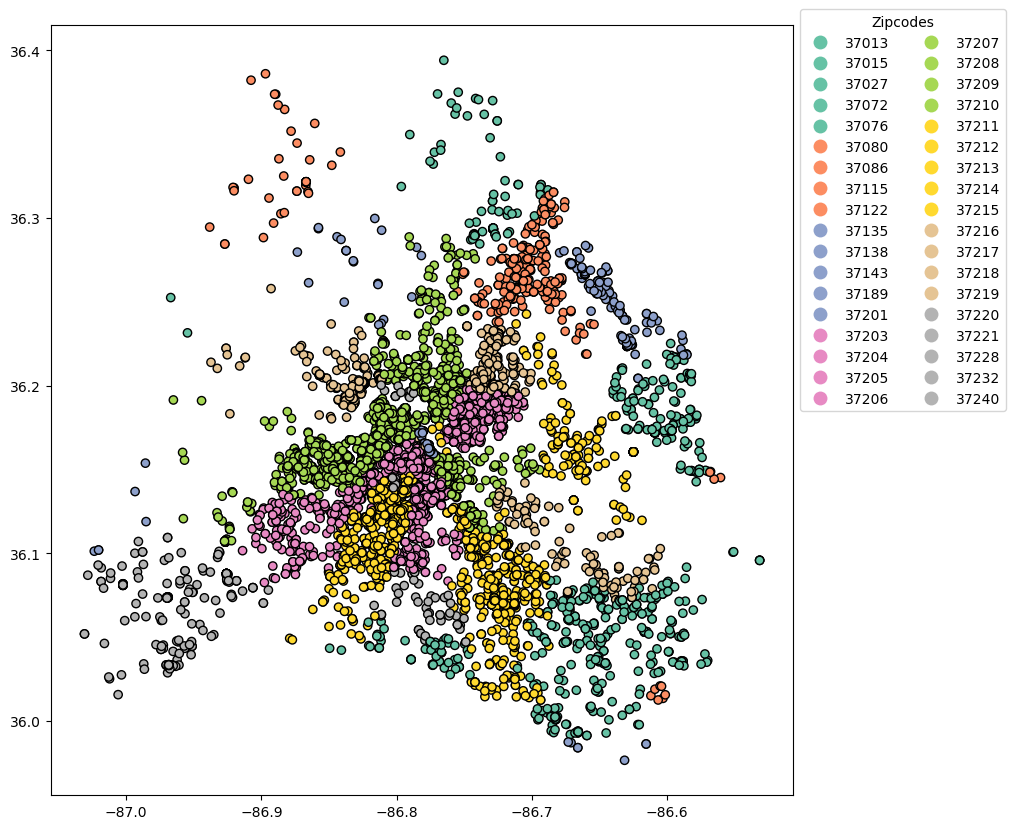

In [20]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

permits_by_zip.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [23]:
 zip_map_permits = permits_by_zip.groupby(['ZIP', 'Permit Type']).size().reset_index(name='count')

In [24]:
 zip_map_permits.info

<bound method DataFrame.info of        ZIP Permit Type  count
0        0        CACH      1
1        0        CACN      1
2        0        CACT      1
3        0        CARN     15
4        0        CAUO      1
..     ...         ...    ...
382  37228        CACR      5
383  37228        CASN      1
384  37228        CAUO      5
385  37232        CACR      1
386  37240        CACR      1

[387 rows x 3 columns]>

In [25]:
 zip_map_permits.shape

(387, 3)

AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolor'

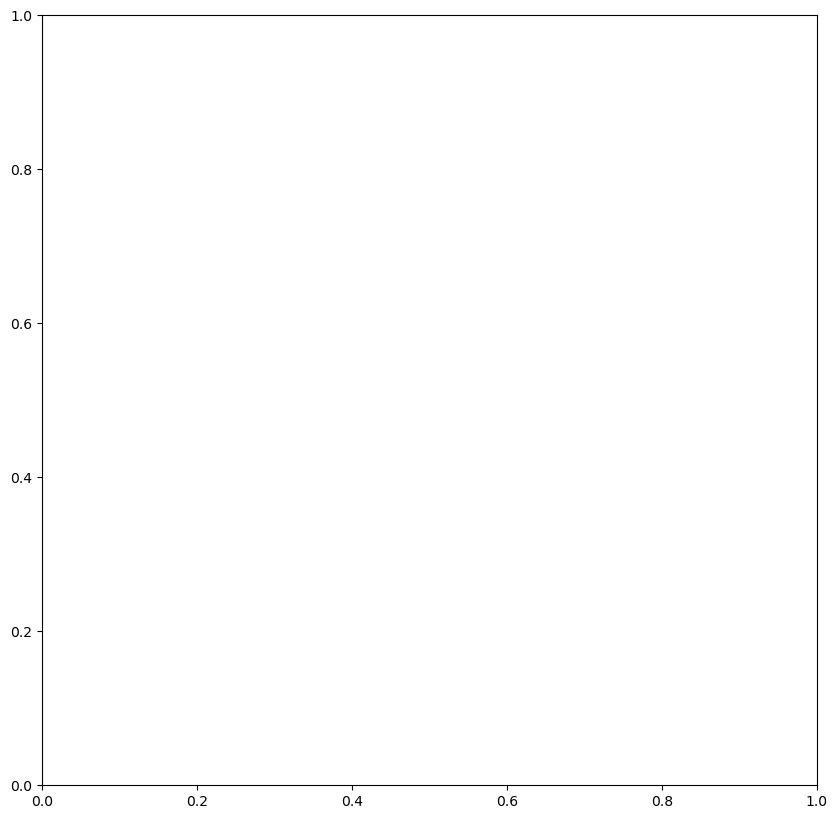

In [26]:

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
zip_map_permits.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


plt.title("Permit Types by ZIP Code", fontsize=15)
plt.show()
